<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Verdezoto Prado, Jessica Jacqueline**

**18-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
%reload_ext autoreload
%autoreload 2
import importlib
import miningscience
importlib.reload(miningscience)
# Escriba aquí su código para el ejercicio 1
import miningscience as msc

print("Descripción de l funcion download_pubmed:")
help(msc.download_pubmed)

print("Descripción de la funcion mining_pubs:")
help(msc.mining_pubs)


Descripción de l funcion download_pubmed:
Help on function download_pubmed in module miningscience:

download_pubmed(keyword: str)
    La primera función download_pubmed se usa para extraer el conteo
    de los IDs de los artículos con una palabra clave -keyword- definida respectivamente

Descripción de la funcion mining_pubs:
Help on function mining_pubs in module miningscience:

mining_pubs(tipo: str) -> pandas.core.frame.DataFrame
    La segunda función mining_pubs se usa para extraer datos mas precisos ubicados en el texto, utilizando otros parametros, en este caso usamos -tipo-




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [13]:
Info = msc.download_pubmed("Ecuador genomics")
Info_count = Info["Count"]
first_element_id = Info["IdList"][0]
print(f"El número de artículos es: {Info_count}") # xx corresponde al número de artículos recuperados

print(f"El PMID del primer artículo es: {first_element_id}") # xxxxxx

El número de artículos es: 193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [14]:
print("Dataframe de articulos con año:")
Datf_pub_year = msc.mining_pubs("DP")
print(Datf_pub_year.dtypes)
display(Datf_pub_year.tail(2))

print("\nDataframe de articulos con autores:")
Datf_pub_authors = msc.mining_pubs("AU")
display(Datf_pub_authors.head(2))
display(Datf_pub_authors.tail(2))

print("\nDataframe de número de articulos por pais:")
Datf_countries = msc.mining_pubs("AD")
display(Datf_countries.head(2))
display(Datf_countries.tail(2))


Dataframe de articulos con año:
PMID       object
DP_year     int64
dtype: object


,PMID,DP_year
191,17187350,2007
192,8661097,1996



Dataframe de articulos con autores:


,PMID,num_auth
0,35121084,12
1,35120121,14


,PMID,num_auth
189,19177531,7
190,19018989,1



Dataframe de número de articulos por pais:


,country,num_auth
0,United States,12
1,United States,14


,country,num_auth
190,England,1
191,United States,9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Text(-3.74922, 40.463667, 'Spain')

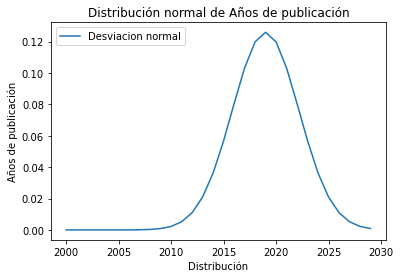

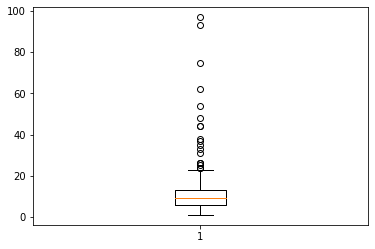

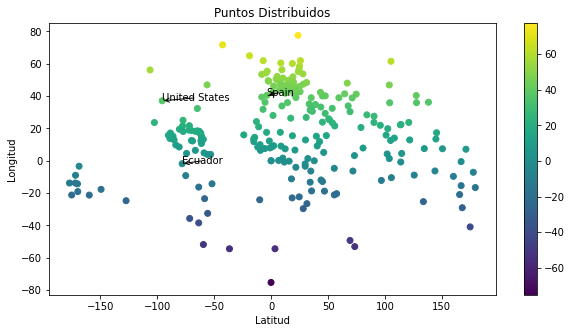

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Datf_pub_yer
median_pubyr = Datf_pub_year.median(numeric_only=True)
D_standar_pubyr = Datf_pub_year.std(numeric_only=True)


ptos = np.arange(2000, 2030, 1)

fig1, ax1 = plt.subplots()

label = "Desviacion normal"
ax1.plot(ptos, norm.pdf(ptos,median_pubyr, D_standar_pubyr), label=label)
ax1.set_title("Distribución normal de Años de publicación")
ax1.set_xlabel("Distribución")
ax1.set_ylabel("Años de publicación")
ax1.legend(loc = "upper left")

# Datf_pub_authors
Datf_pub_authors.drop(Datf_pub_authors[Datf_pub_authors['num_auth'] > 100].index, inplace=True) 
Datf_pub_authors.sort_values(by="num_auth", ascending=False, inplace=True) #Se ordenan los datos

fig2, ax2 = plt.subplots()

ax2.boxplot(Datf_pub_authors["num_auth"])

# Datf_countries
#Latitud y Longitud
LatLon_countries = pd.read_csv('./data/Lat_countries.csv', engine='python', skipfooter=3)

LatLon_countries['name'] = LatLon_countries['name'].str.lower()
LatLon_countries= LatLon_countries.rename(columns={'name': 'country_name'})

Datf_countries['country'] = Datf_countries['country'].str.lower()

Datf_countries = Datf_countries.rename(columns={'country': 'country_name'})

Alldata = pd.concat([Datf_countries, LatLon_countries]).groupby(['country_name']).sum()

Alldata = Alldata[Alldata['num_auth'].notna()]


plt.figure(figsize=(10,5))
plt.title('Puntos Distribuidos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')


plt.scatter(Alldata['longitude'], Alldata['latitude'], c=Alldata['latitude'], marker='o', label='Puntos')
plt.colorbar()

plt.annotate('Ecuador', xy= (Alldata.loc['ecuador']['longitude'], Alldata.loc['ecuador']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('United States', xy= (Alldata.loc['united states']['longitude'], Alldata.loc['united states']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Spain', xy= (Alldata.loc['spain']['longitude'], Alldata.loc['spain']['latitude']), arrowprops={'arrowstyle': '->'})

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [1]:
# Código del ejercicio 6
import Bio 
from Bio import Entrez
from Bio.Seq import Seq
from Bio import SeqIO
from IPython.core.display import Image

from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os
import Bio


In [ ]:
with open("data/sequence.seq") as d
    Entrez.email = "jessica.verdezoto@est.ikiam.edu.ec" 

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

